### Image classification using MNIST dataset in Neural Network
1. Classification of MNIST image dataset
2. Using Keras classfication model
3. Train and Predict Model images

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x, y, z ==> 3D Images
print(x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


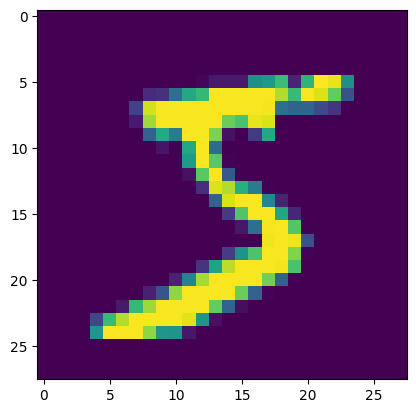

In [3]:
# Show first row image (handwritten)
plt.imshow(x_train[0])

In [4]:
# Images features and pre-processing
# Converting 3D dimensions to 2D (Flatten Images)
n_features = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], n_features).astype('float32')
x_test = x_test.reshape(x_test.shape[0], n_features).astype('float32')


In [5]:
# Target feature into categorial values
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Making classification model
from keras.models import Sequential
from keras.layers import Dense, Input

# classes in output
n_classes = y_train.shape[1]

def classification_model():
    model = Sequential()
    model.add(Input(shape= (n_features,)))
    model.add(Dense(n_features, activation= 'relu'))
    model.add(Dense(100, activation= 'relu'))
    model.add(Dense(n_classes, activation= 'softmax'))

    model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
    return model

model = classification_model()

In [7]:
# Model fit and prediction
training = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 10, verbose= 2)

Epoch 1/10
1875/1875 - 14s - 8ms/step - accuracy: 0.8361 - loss: 1.2105 - val_accuracy: 0.9231 - val_loss: 0.3121
Epoch 2/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9240 - loss: 0.3047 - val_accuracy: 0.9430 - val_loss: 0.3067
Epoch 3/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9457 - loss: 0.2115 - val_accuracy: 0.9562 - val_loss: 0.1719
Epoch 4/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9588 - loss: 0.1587 - val_accuracy: 0.9579 - val_loss: 0.1783
Epoch 5/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9654 - loss: 0.1359 - val_accuracy: 0.9626 - val_loss: 0.1647
Epoch 6/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9699 - loss: 0.1167 - val_accuracy: 0.9646 - val_loss: 0.1475
Epoch 7/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9722 - loss: 0.1123 - val_accuracy: 0.9686 - val_loss: 0.1478
Epoch 8/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9767 - loss: 0.0964 - val_accuracy: 0.9705 - val_loss: 0.1405
Epoch 9/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9764 - loss: 0.0984 - val_accurac

In [8]:
# Model Prediction
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


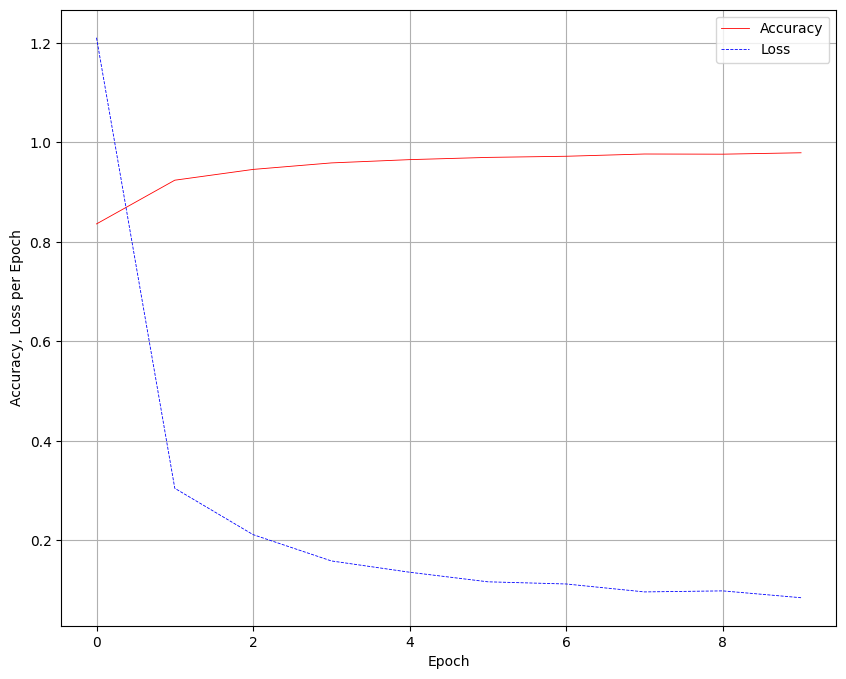

In [12]:
# Visualization of Epoch with accuracy and loss
plt.figure(figsize= (10, 8))

plt.plot(training.history['accuracy'], linewidth= 0.6, color= 'red', label= 'Accuracy')
plt.plot(training.history['loss'], linewidth= 0.6, linestyle= '--', color = 'blue', label= 'Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy, Loss per Epoch')
plt.grid(visible= True, axis= 'both')
plt.show()